# Convoluciones

Hemos visto que las redes neuronales convolucionales se basan en las convoluciones, así que vamos a ver en qué consisten

 > Nota: En realidad no se hace una convolución, ya que una convolución es una operación matemática dentro del procesamiento de señales, en la que el filtro se invierte, se desplaza sobre la señal y se realiza la integral. Aquí no hacemos nada de eso, sino que la operación matemática que en realidad se emplea es la correlación cruzada. Pero se ha llamado así desde el inicio, y por convenio se sigue llamando así

Este es un tipo de operación entre dos matrices, viene bien conocerlo para entender cómo funcionan las redes convolucionales. Pero no es algo que vayamos a hacer nosotros, todas las operaciones matemáticas las hará Pytorch por nosotros, por lo que si no las consigues entender, o no quieres aprenderlas no te preocupes, ya que no es algo indispensable. Pero si viene bien saber cómo funcionan, al menos tener una idea.

## Cómo se calculan las convoluciones

La convolución consiste en la suma del producto escalar deslizante entre dos matrices. Es decir, se coloca el filtro sobre el inicio de la matriz, se realiza el producto escalar de cada uno de los componentes que coinciden de las dos matrices, se suman todos los productos escalares y el resultado supone el valor del inicio de la matriz resultante. Se desplaza el filtro y se vuelve a repetir la operación.

Sé que esta explicación no aclara nada, así que lo mejor es verlo gráficamente

En el siguiente gif se puede ver en qué consiste la convolución entre dos matrices

![convolution](Imagenes/Animaci%C3%B3n%20convoluci%C3%B3n.gif)

## Convoluciones en Pytorch

Este filtro que hemos visto en realidad consiste en un filtro de detección de bordes verticales, así que vamos a verlo cómo actúa sobre una imagen real. Vamos a verlo sobre una imagen de un código QR

Importamos la imagen

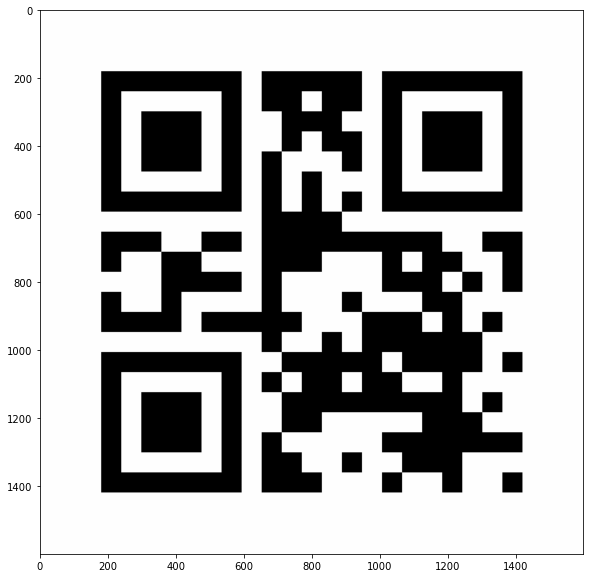

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('Imagenes/qr.png')
fig = plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')
plt.show()

La convertimos a un tensor

In [2]:
import numpy as np
import torch

array = np.array(img)
tensor = torch.from_numpy(array)
tensor.shape

torch.Size([1600, 1600])

Vemos que la imagen corresponde a un tensor de 1600x1600 píxeles, solo tiene un canal, es decir, es una imagen en blanco y negro. Para poder usar la convolución de Pytorch, necesitamos añadirle 2 dimensiones, una correspondiente al batch size y otra correspondiente al número de canales

In [3]:
tensor = tensor.unsqueeze(0).unsqueeze(0).type(torch.float32)
tensor.shape, tensor.dtype

(torch.Size([1, 1, 1600, 1600]), torch.float32)

Definimos el filtro que hemos visto en el ejemplo. Al igual que antes, le añadimos dos dimensiones, una para el batch size y otra para el número de canales

In [4]:
filter = torch.tensor([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
print(filter)
filter = filter.unsqueeze(0).unsqueeze(0).type(torch.float32)
filter.shape, filter.dtype

tensor([[ 1,  0, -1],
        [ 1,  0, -1],
        [ 1,  0, -1]])


(torch.Size([1, 1, 3, 3]), torch.float32)

Realizamos la convolución

In [16]:
import torch.nn.functional as F

tensor_filtered = F.conv2d(tensor, filter)
tensor_filtered.shape

torch.Size([1, 1, 1598, 1598])

Quitamos las dimensiones correspondientes al batch size y al número de canales

In [17]:
tensor_filtered = tensor_filtered.squeeze()
tensor_filtered.shape

torch.Size([1598, 1598])

Vemos que la dimensión de la imagen filtrada ya no es de 1600x1600 píxeles, sino que es de 1598x1598 píxeles. Luego explicaremos esto

Convertimos el tensor a una imagen

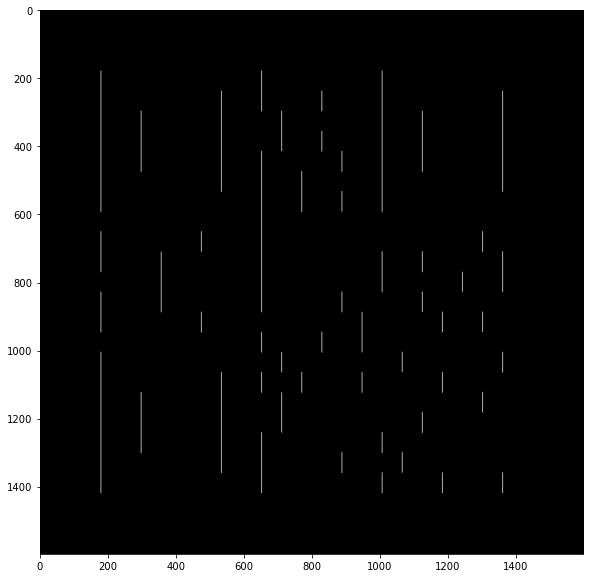

In [18]:
import torchvision.transforms as T

img_filtered = T.ToPILImage()(tensor_filtered)
fig = plt.figure(figsize=(10, 10))
plt.imshow(img_filtered, cmap='gray')
plt.show()

Representamos la imagen original y la filtrada

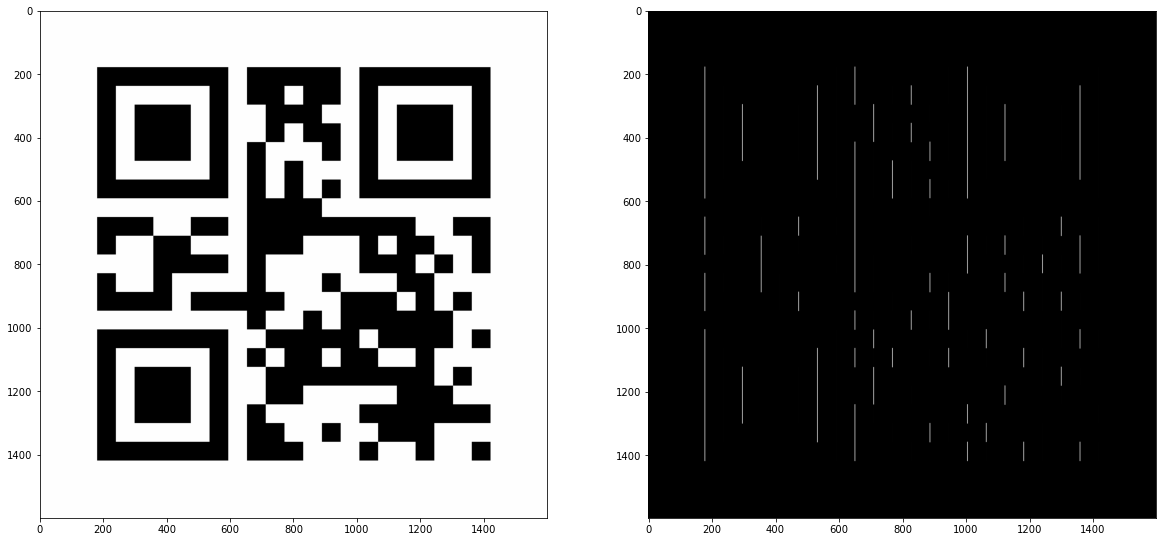

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(img_filtered, cmap='gray')
plt.show()

Como habíamos dicho, este filtro detecta los bordes verticales, pero los detecta solo cuando se produce una transición de blanco a negro

## Cambio de tamaño de imagen filtrada

En el primer ejemplo teníamos una imagen de 6x6 píxeles y un filtro de 3x3 píxeles, con lo que hemos acabado con una imagen de 4x4 píxeles, eso es porque el filtro solo se va a poder colocar sobre 4 posiciones distintas de la imagen a lo largo y a lo alto

Por tanto si tenemos una imagen de `HxW` y un filtro de `nxm` la imagen resultante va a ser de `(H-n+1)x(W-m+1)`